In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
path = '''/home/paperspace/fastai/course-v3/nbs/dl1/music/'''

In [1]:
!kaggle datasets download mousehead/songlyrics
!unzip songlyrics.zip
!rm -r songlyrics.zip

 91%|██████████████████████████████████▍   | 19.0M/21.0M [00:00<00:00, 41.1MB/s]
100%|██████████████████████████████████████| 21.0M/21.0M [00:00<00:00, 52.5MB/s]
Archive:  songlyrics.zip
  inflating: songdata.csv            
rm: cannot remove 'sopnglyrics.zip': No such file or directory


In [3]:
!ls

Abdu songs-all-fit.ipynb	      lyrics_total_lm
Abdu songs.ipynb		      lyrics_total_lm_deduped
ArtistUrl.csv			      lyrics_total_lm_deduped_no_chorus
every-song-you-have-heard-almost.zip  lyrics_total_lm_deduped_no_chorus_2
Lyrics1.csv			      models
Lyrics2.csv			      songdata.csv
lyrics_combined_df.pkl		      songlyrics.zip
lyrics_combined_lm		      taylor_swift_lyrics.csvfinal.csv
lyrics_total_df_clean_1.pkl	      Untitled.ipynb
lyrics_total_df.pkl


In [ ]:
lyrics_1 = pd.read_csv(f'{path}Lyrics1.csv')
#print(lyrics_1.head())

lyrics_2 = pd.read_csv(f'{path}Lyrics2.csv')
#print(lyrics_2.head())

lyrics_total = lyrics_1.append(lyrics_2)
#print(lyrics_total.head())

lyrics_total['Lyrics'] = lyrics_total['Lyrics'].str.replace('\n',' . ', regex=False)
lyrics_total['Lyrics'] = lyrics_total['Lyrics'].str.replace('\r','', regex=False)
#print(lyrics_total.head(), len(lyrics_total))

lyrics_total.dropna(inplace=True)
lyrics_combined = lyrics_total[(lyrics_total.Band == 'Coldplay') | (lyrics_total.Band == 'Taylor Swift') | (lyrics_total.Band == 'Selena Gomez') |
                           (lyrics_total.Band == 'Sugarland') | (lyrics_total.Band == 'Lorde') | (lyrics_total.Band == 'Lana Del Rey') |
                           (lyrics_total.Band == 'Bob Dylan') | (lyrics_total.Band == 'Keane') | (lyrics_total.Band == 'Onerepublic') |
                           (lyrics_total.Band == 'Snow Patrol') | (lyrics_total.Band == 'Imagine Dragons') | (lyrics_total.Band == 'The Fray') |                           (lyrics_total.Band == 'Sugarland') | (lyrics_total.Band == 'Lorde') | (lyrics_total.Band == 'Lana Del Rey') |
                           (lyrics_total.Band == 'Ed Sheeran') | (lyrics_total.Band == 'Shawn Mendes') | (lyrics_total.Band == 'John Mayer') |
                           (lyrics_total.Band == 'Jason Myraz') |
                           (lyrics_total.Band == 'Colbie Calliat')]


lyrics_combined.drop(['Band','Song'], axis=1, inplace=True)

print(lyrics_combined.head(), len(lyrics_combined))

lyrics_combined.to_pickle('lyrics_combined_df.pkl')

In [7]:
df = pd.read_pickle('lyrics_combined_df.pkl')
df.rename(columns={'Lyrics':'text'}, inplace=True)
print(len(df))
print(df.head())

1478
                                                    text
17805  absolutely no one who knows me better . no one...
17806  they say this town . the stars stay up all nig...
17807  friday, payday, lordy got to get away . had it...
17808  oh i swear this town gets smaller everyday,  ....
17809  i was born in the heart of a hurricane season ...


In [8]:
from itertools import chain, groupby

def stride(lst, offset, length):
    if offset:
        yield lst[:offset]

    while True:
        yield lst[offset:offset + length]
        offset += length
        if offset >= len(lst):
            return

def dedupe(lst):
    return list(chain(*[item[0] for item in groupby(lst)]))

def cleanse(list_of_words, max_phrase_length):
    for length in range(1, max_phrase_length + 1):
        for offset in range(length):
            list_of_words = dedupe(stride(list_of_words, offset, length))

    return list_of_words

In [14]:
df['text'] = df['text'].astype(str)
df['text'] = df.text.str.lower()
df['text'] = df['text'].str.replace('\n',',', regex=False)
df['text'] = df['text'].str.replace('\r','', regex=False)
df['text'] = df['text'].str.replace('-', '', regex=False)
df['text'] = df['text'].str.replace('\((.*?)\)','',regex=True)
df['text'] = df['text'].str.replace('\[(.*?)\]','',regex=True)
df['text'] = df['text'].apply(lambda x : cleanse(x.split(), 5))
df['text'] = df['text'].apply(lambda x : " ".join(x)) 
print(df.head(), len(df))

                                                    text
17805  absolutely no one who knows me better no one t...
17806  they say this town the stars stay up all night...
17807  friday, payday, lordy got to get away had it w...
17808  oh i swear this town gets smaller everyday. an...
17809  i was born in the heart of a hurricane season ... 1478


In [15]:
df['text'] = df['text'].apply(lambda x : cleanse(x.split(' '), 2))
df['text'] = df['text'].apply(lambda x : " ".join(x)) 
print(df.head(20), len(df))

                                                    text
17805  absolutely no one who knows me better no one t...
17806  they say this town the stars stay up all night...
17807  friday, payday, lordy got to get away had it w...
17808  oh i swear this town gets smaller everyday. an...
17809  i was born in the heart of a hurricane season ...
17810  i got miles of trouble spreadin far and wide b...
17811  well, it's two miles east to west only four mi...
17812  monday, hard to wake up fill my coffee cup, i'...
17813  we drove all night to get to corpus christi my...
17814  go ahead and take your best shot. let 'er rip,...
17815  it ain't often i take time to answer calls on ...
17816  i was on a fast curve, lost my nerve on a dead...
17817  looking for an angel in these hills looking fo...
17818  there's a place i like to go cherry bombs and ...
17819  grew up on a tight rope learned to smile even ...
17820  cowboys ride into sunsets the good guy always ...
17821  mean girls well, i ain't

In [16]:
df['text'] = df['text'].str.replace(', ,', ',', regex=False)
df['text'] = df['text'].str.replace('. ,', '.', regex=False)
df['text'] = df['text'].str.replace(', .', '.', regex=False)
print(df.head())

                                                    text
17805  absolutely no one who knows me better no one t...
17806  they say this town the stars stay up all night...
17807  friday, payday, lordy got to get away had it w...
17808  oh i swear this town gets smaller everyday. an...
17809  i was born in the heart of a hurricane season ...


In [17]:
df['text'] = df['text'].str.replace('"', '', regex=False)
df['text'] = df['text'].str.replace(', ,', ',', regex=False)
df['text'] = df['text'].str.replace('. ,', '.', regex=False)
df['text'] = df['text'].str.replace(', .', '.', regex=False)
df['text'] = df['text'].str.replace(',,', ',', regex=False)
df['text'] = df['text'].str.replace('.,', '.', regex=False)
df['text'] = df['text'].str.replace(',.', '.', regex=False)
df['text'] = df['text'].str.replace('...', '.', regex=False)
df['text'] = df['text'].str.replace('? ,', '?', regex=False)
df['text'] = df['text'].str.replace(', ?', '?', regex=False)
df['text'] = df['text'].str.replace('?,', '?', regex=False)
df['text'] = df['text'].str.replace(',?', '?', regex=False)
df['text'] = df['text'].str.replace('''' ''', ' ', regex=False)
df['text'] = df['text'].str.replace(' . ', ' ', regex=False)
df['text'] = df['text'].astype(str)
df['text'] = df.text.str.lower()
print(df.head(50))

                                                    text
17805  absolutely no one who knows me better no one t...
17806  they say this town the stars stay up all night...
17807  friday, payday, lordy got to get away had it w...
17808  oh i swear this town gets smaller everyday. an...
17809  i was born in the heart of a hurricane season ...
17810  i got miles of trouble spreadin far and wide b...
17811  well, it's two miles east to west only four mi...
17812  monday, hard to wake up fill my coffee cup, i'...
17813  we drove all night to get to corpus christi my...
17814  go ahead and take your best shot. let 'er rip,...
17815  it ain't often i take time to answer calls on ...
17816  i was on a fast curve, lost my nerve on a dead...
17817  looking for an angel in these hills looking fo...
17818  there's a place i like to go cherry bombs and ...
17819  grew up on a tight rope learned to smile even ...
17820  cowboys ride into sunsets the good guy always ...
17821  mean girls well, i ain't

In [18]:
df.to_pickle('lyrics_combined_df.pkl')

In [19]:
df = pd.read_pickle('lyrics_combined_df.pkl')
df.rename(columns={'Lyrics':'text'}, inplace=True)
print(df.head(40), len(df))

                                                    text
17805  absolutely no one who knows me better no one t...
17806  they say this town the stars stay up all night...
17807  friday, payday, lordy got to get away had it w...
17808  oh i swear this town gets smaller everyday. an...
17809  i was born in the heart of a hurricane season ...
17810  i got miles of trouble spreadin far and wide b...
17811  well, it's two miles east to west only four mi...
17812  monday, hard to wake up fill my coffee cup, i'...
17813  we drove all night to get to corpus christi my...
17814  go ahead and take your best shot. let 'er rip,...
17815  it ain't often i take time to answer calls on ...
17816  i was on a fast curve, lost my nerve on a dead...
17817  looking for an angel in these hills looking fo...
17818  there's a place i like to go cherry bombs and ...
17819  grew up on a tight rope learned to smile even ...
17820  cowboys ride into sunsets the good guy always ...
17821  mean girls well, i ain't

In [3]:
bs = 64

In [21]:
data = (TextList.from_df(df, path, cols='text')
                .random_split_by_pct(0.1)
                .label_for_lm()
                .databunch(bs=bs))
data.save('/app/static/data_lm')

In [4]:
data_lm = TextLMDataBunch.load(path, 'leaves-of-ai/app/static/data_lm', bs=bs)
data_lm.show_batch(rows=20)

idx,text
0,"you do it and do it one time . there you go pulling me right back in right back in , right back in and i know i 'm never letting this go i 'm stuck on you whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue some days"
1,"a little closer baby . we can talk without the words hang a sign on the door , please do not . please do not disturb when i lay down in the evening all i really want to do . when i wake up , when i wake up in the morning baby . all i really want to do xxbos my mama mapped out the road that she knows"
2,"smoke horizon wo n't give up the fight fire like lightening burnin up the night a smoke horizon wo n't give up the fight well , deep inside can you hear that call ? wakin your heart and shakin your walls where love is found , the nations fall a cry will rise above it all we are all we are , we are young ! shine like diamonds cut"
3,"that i want her tell her that i need her tell her that she 's more than a onenight stand tell her that i love her more than anyone else if you do n't , then i 'll tell her myself and we 've got love in us so if the drink kill us we 're gon na dance all night till the floor xxunk if we talk outside i"
4,"way and maybe you should learn to love her like , like the way you wanna be loved , hey i do it for the love , waiting on the gold rush keep it on the edge , smoking on a roll up when i see my friends , all they say is hold up and remember the time when we were in school , listening to grown ups did"
5,while but i 've got no plans at all to leave and would you take away my hopes and dreams ? just stay with me all my senses come to life while i 'm stumbling home as drunk as i have ever been and i 'll never leave again 'cause you are the only one and all my friends have gone to find another place to let their hearts collide
6,"when we got paid we 'd buy cheap spirits and drink them straight me and my friends have not thrown up in so long , oh how we 've grown but i ca n't wait to go home i 'm on my way driving at ninety down those country lanes singing to tiny dancer and i miss the way you make me feel , and it 's real we watched"
7,"heard it , darling , you look perfect tonight well i found a woman , stronger than anyone i know she xxunk my dreams , i hope that someday i 'll share her home i found a love , to carry more than just my secrets to carry love , to carry children of our own we are still kids , but we 're so in love fighting against all"
8,me for anything you like and i no i do n't mind xxbos i do n't know your face no more or feel the touch that i adore i do n't know your face no more it 's just a place i 'm looking for we might as well be strangers in another town we might as well be living in a different world we might as well i do
9,"gun without a reason you understand i look out for you come rain , come shine what good does it do ? i guess i 'm a toy that is broken i guess we 're just older now who says the river ca n't leave its waters ? who says you walk in a line ? who says the city change its xxunk ? who says you 're mine ?"


In [5]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=URLs.WT103_1, drop_mult=0.4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02


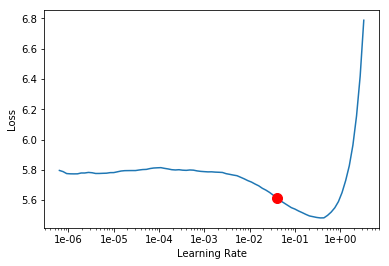

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(3, 3e-2)

epoch,train_loss,valid_loss,accuracy
1,4.857316,4.414676,0.197718
2,4.301091,4.240213,0.213145
3,3.850927,4.161656,0.223735


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07


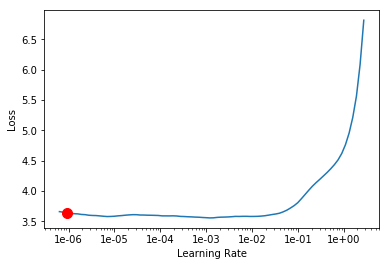

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(10, slice(1e-4,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.573188,4.158583,0.225223
2,3.546523,4.115327,0.230828
3,3.438178,4.074120,0.239658
4,3.332717,4.042652,0.246801
5,3.235477,4.016857,0.250298
6,3.137173,3.997612,0.255952
7,3.058514,3.989526,0.259474
8,3.022945,3.979706,0.261830
9,2.976565,3.980662,0.261359
10,2.944232,3.983280,0.260689


In [14]:
learn.save('Initial_fit_render')

In [6]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=True, drop_mult=0.3)

In [17]:
learn.load('Initial_fit_render')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1331 items)
x: LMTextList
xxbos xxunk no one who knows me better no one that can make me feel so good how did we stay so long together when everybody said we never would and just when i start to think they 're right that love has died there you go making my heart beat again heart beat again , heart beat again there you go making me feel like a kid wo n't you do it and do it one time . there you go pulling me right back in right back in , right back in and i know i 'm never letting this go i 'm stuck on you whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue some days i do n't feel like trying some days you know i wanna just give up when it does n't matter who 's right fight about it all night had enough you give me that look i 'm sorry baby let 's make up you do that thing that makes me laugh and just like that there you go making my heart b

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.09E-05


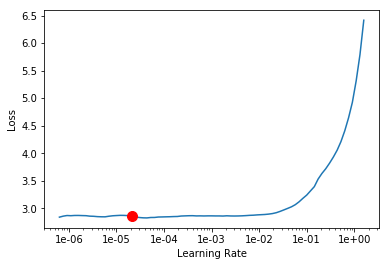

In [18]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(5, slice(1e-4,1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.859836,3.988062,0.262698
2,2.838120,3.968768,0.267684
3,2.745850,3.943497,0.271875
4,2.670281,3.949076,0.274033
5,2.608480,3.954669,0.274926


In [21]:
learn.fit_one_cycle(3, 1e-3, moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy
1,2.649945,3.931965,0.278299
2,2.535975,3.892663,0.290129
3,2.325736,3.901695,0.294940


In [22]:
learn.fit_one_cycle(3, 1e-3, moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy
1,2.295465,3.895061,0.297272
2,2.205605,3.885594,0.306473
3,1.996905,3.900741,0.310218


In [23]:
learn.fit_one_cycle(3, 1e-3, moms=(0.7,0.6), wd=0.1)

epoch,train_loss,valid_loss,accuracy
1,2.007854,3.894826,0.312574
2,1.927806,3.881098,0.322917
3,1.763449,3.899900,0.325942


In [24]:
learn.save('final_fit_render')

In [6]:
learn.load('final_fit_render')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1331 items)
x: LMTextList
xxbos xxunk no one who knows me better no one that can make me feel so good how did we stay so long together when everybody said we never would and just when i start to think they 're right that love has died there you go making my heart beat again heart beat again , heart beat again there you go making me feel like a kid wo n't you do it and do it one time . there you go pulling me right back in right back in , right back in and i know i 'm never letting this go i 'm stuck on you whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue whoaoh , whoaoh stuck like glue you and me baby we 're stuck like glue some days i do n't feel like trying some days you know i wanna just give up when it does n't matter who 's right fight about it all night had enough you give me that look i 'm sorry baby let 's make up you do that thing that makes me laugh and just like that there you go making my heart b

In [12]:
#this is the version with the cosine annealing of the temperature with only 1 line
def generate_lyric(word='', temp_init=1, decay=50, stops = ['.'], comma_limit=2, words=50):
    seeds = ['you are', 'i love you', 'we are', 'how can']
    word = random.choice(seeds)
    again = []
    stops.append('xxbos')
    last_4 = ['','','','']
    #check_temp = []
    total = []
    stops.append('xxbos')
    i = 0
    commas = 0
    temp = temp_init
    while True:
        if any(x in word for x in stops):
            break
        if commas > comma_limit:
            break    
        if all(x in (" ".join([i for i in word.split()[-9:-5]])) for x in last_4) and (len(word.split()) > 10):
            break
        addition = learn.predict(word, 1, temperature=temp)
        total.append(addition)
        commas = addition.count(',')
        last_4 = total[i].split()[-4:]
        word = addition
        #print(total[i])
        i += 1
        temp = max(abs((math.cos(i * math.pi / decay)))*temp_init,0.1)
        #check_temp.append(temp)

#below is the retokenization of the words
    words = total[-2].split()
    for i, word in enumerate(words):
        if word == 'xxbos':
            words[i] = '<br/>'
        elif word == 'xxmaj':
            words[i+1] = words[i+1][0].upper() + words[i+1][1:]
            words[i] = ''
        elif word == 'xxup':
            words[i+1] = words[i+1].upper()
            words[i] = ''     
        elif word == 'xxunk' or word == '(' or word == ')' or word == '"':
            words[i] = ''   
        elif word == "n't":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ",":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == '.' or word == '?' or word == '!' or word == ';':
            words[i-1]+= words[i]
            words[i] = ''
        elif word[0] == "'":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ' ':
            words[i] = ''
        elif "n't" in word:
            words[i-1]+= words[i]
            words[i] = ''
        elif word == "na":
            words[i-1]+= words[i]
            words[i] = ''
        try:
            words.remove('')
        except:
            continue
            
    return(' '.join(words))
generate_lyric()



"i love you like the other kids at the same old age pulling me out of the right hand and the left hand me, the left thumb, both my fingers and thumb your arms and fingers and thumbs and i'm stood on the ground the shape of you was up and it was sweet sand just like a woman in love come on"

In [8]:
#this is the version with the cosine annealing of the temperature with only 1 line - best
#this is the best one with the total reconfigured
def generate_lyric(temp_init=1, decay=50, stops = ['.'], comma_limit=2, words=50):
    seeds = ['you are', 'i love you', 'we are', 'how can']
    word = random.choice(seeds)
    again = []
    stops.append('xxbos')
    last_4 = ['','','','']
    #check_temp = []
    total = []
    stops.append('xxbos')
    i = 0
    commas = 0
    temp = temp_init
    while True:
        if any(x in word for x in stops):
            break
        if commas > comma_limit:
            break    
        if all(x in (" ".join([i for i in word.split()[-9:-5]])) for x in last_4) and (len(word.split()) > 10):
            break
        addition = learn.predict(word, 1, temperature=temp)
        total.append(addition)
        total = total[-2:]
        commas = addition.count(',')
        last_4 = total[-1].split()[-4:]
        word = addition
        #print(total[i])
        i += 1
        temp = max(abs((math.cos(len(total) * math.pi / decay)))*temp_init,0.1)
        #check_temp.append(temp)

#below is the retokenization of the words
    words = total[-2].split()
    for i, word in enumerate(words):
        if word == 'xxbos':
            words[i] = '<br/>'
        elif word == 'xxmaj':
            words[i+1] = words[i+1][0].upper() + words[i+1][1:]
            words[i] = ''
        elif word == 'xxup':
            words[i+1] = words[i+1].upper()
            words[i] = ''     
        elif word == 'xxunk' or word == '(' or word == ')' or word == '"':
            words[i] = ''   
        elif word == "n't":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ",":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == '.' or word == '?' or word == '!' or word == ';':
            words[i-1]+= words[i]
            words[i] = ''
        elif word[0] == "'":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ' ':
            words[i] = ''
        elif "n't" in word:
            words[i-1]+= words[i]
            words[i] = ''
        elif word == "na":
            words[i-1]+= words[i]
            words[i] = ''
        try:
            words.remove('')
        except:
            continue
            
    return(' '.join(words))

generate_lyric()



"you are the only one although my mind just flows to me to be ignored the plans i we have made in the things that you'd see when your eyes are closed we'll never be finds miles that particular fallen beneath our feet but the fields are empty outside i don't know why i love you anymore i don't know you anymore i left you in the pieces of my dreams you changed so a lot you see ay an the air we saw in my eyes i wo n’t mourn, i ain't sittin on top of the world now, i'm answers for each beautiful day"

In [8]:
#this is the version with the cosine annealing of the temperature with only 1 line- this is the best
#added the optional seeds for if the input is blank
#trying to implement beam search

def generate_lyric(data, temp_init=1, decay=50, stops = ['.'], comma_limit=2, words=50):
    seeds = ['you are', 'i love you', 'we are', 'how can']
    if data:
        word = data
    else:
        word = random.choice(seeds)
    again = []
    stops.append('xxbos')
    last_4 = ['','','','']
    #check_temp = []
    total = []
    stops.append('xxbos')
    i = 0
    commas = 0
    temp = temp_init
    while True:
        if any(x in word for x in stops):
            break
        if commas > comma_limit:
            break    
        if all(x in (" ".join([i for i in word.split()[-9:-5]])) for x in last_4) and (len(word.split()) > 10):
            break
        addition = learn.beam_search(word, 1, temperature=temp)
        total.append(addition)
        commas = addition.count(',')
        last_4 = total[i].split()[-4:]
        word = addition
        #print(total[i])
        i += 1
        temp = max(abs((math.cos(len(total) * math.pi / decay)))*temp_init,0.1)
        #check_temp.append(temp)

#below is the retokenization of the words
    words = total[-2].split()
    for i, word in enumerate(words):
        if word == 'xxbos':
            words[i] = '<br/>'
        elif word == 'xxmaj':
            words[i+1] = words[i+1][0].upper() + words[i+1][1:]
            words[i] = ''
        elif word == 'xxup':
            words[i+1] = words[i+1].upper()
            words[i] = ''     
        elif word == 'xxunk' or word == '(' or word == ')' or word == '"':
            words[i] = ''   
        elif word == "n't":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ",":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == '.' or word == '?' or word == '!' or word == ';':
            words[i-1]+= words[i]
            words[i] = ''
        elif word[0] == "'":
            words[i-1]+= words[i]
            words[i] = ''
        elif word == ' ':
            words[i] = ''
        elif "n't" in word:
            words[i-1]+= words[i]
            words[i] = ''
        elif word == "na":
            words[i-1]+= words[i]
            words[i] = ''
        try:
            words.remove('')
        except:
            continue
            
    return(' '.join(words))

generate_lyric('')



RuntimeError: CUDA error: device-side assert triggered

In [9]:
learn.beam_search('hello', 1)

RuntimeError: cuda runtime error (59) : device-side assert triggered at /pytorch/aten/src/THC/generic/THCTensorMath.cu:24